**Making Data Distribution More Gaussian: Many statistical techniques and machine learning algorithms assume that the data is normally distributed. Transformation techniques like Box-Cox or Yeo-Johnson transformations can help in making the data more Gaussian.**

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data=pd.read_csv(r"loan_data_set.csv")

In [13]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**We use function transformers to convert non-normally distributed data into a normal distribution because some machine learning algorithms assume that the data follows a normal distribution, and certain algorithms perform better when the data is normally distributed. Function transformers can be employed when we know that there are important outliers in the data that cannot be removed; they deal with outliers and transform the data into a normally distributed form.**

In [14]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Lets check the distribution of data**

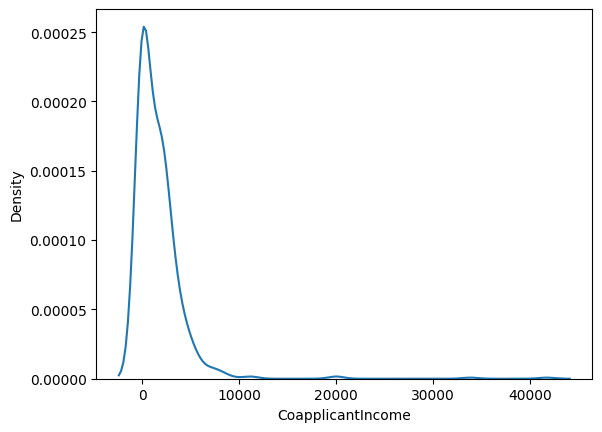

In [15]:
sns.kdeplot(data['CoapplicantIncome'])
plt.show()

**Dat is non-normally distributed**

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [21]:
ft=FunctionTransformer(func=np.log1p)

In [22]:
ft.fit(data["CoapplicantIncome"])

FunctionTransformer(func=<ufunc 'log1p'>)

In [23]:
ft.transform(data["CoapplicantIncome"])

0      0.000000
1      7.319202
2      0.000000
3      7.765993
4      0.000000
         ...   
609    0.000000
610    0.000000
611    5.484797
612    0.000000
613    0.000000
Name: CoapplicantIncome, Length: 614, dtype: float64

In [24]:
data["CoapplicantIncome_ft"]=ft.transform(data["CoapplicantIncome"])

In [25]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.484797
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.000000


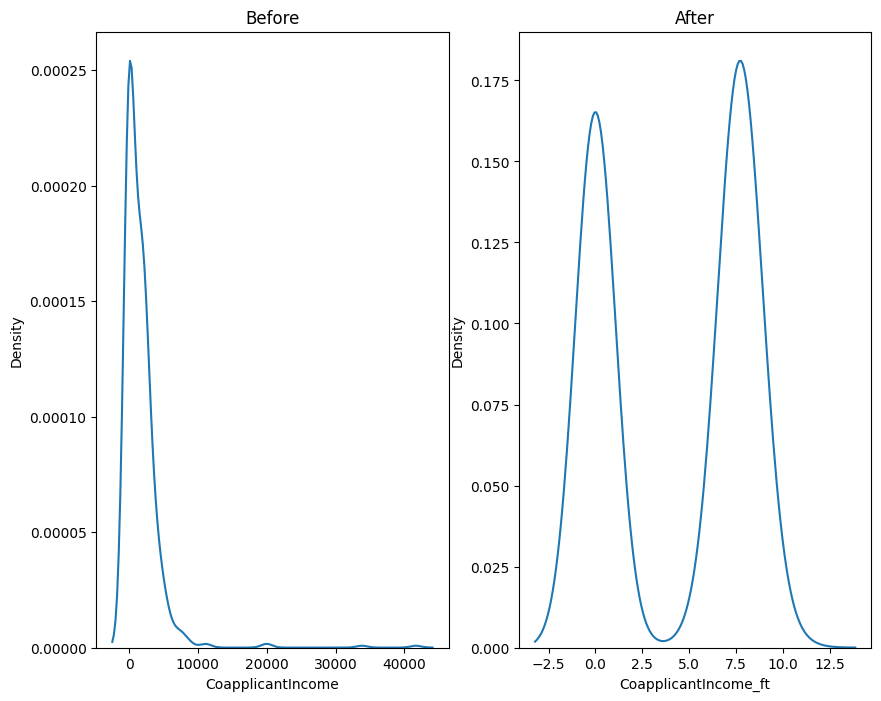

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Before")
sns.kdeplot(data["CoapplicantIncome"])
plt.subplot(1,2,2)
plt.title("After")
sns.kdeplot(data["CoapplicantIncome_ft"])
plt.show()

In [31]:
ft1=FunctionTransformer(func=lambda x:x**2)

In [32]:
ft1.fit(data["CoapplicantIncome"])

FunctionTransformer(func=<function <lambda> at 0x000002816BFBC5E0>)

In [33]:
data["CoapplicantIncome_ft1"]=ft1.transform(data["CoapplicantIncome"])

In [34]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft,CoapplicantIncome_ft1
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202,2274064.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993,5560164.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.000000,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.000000,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.484797,57600.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.000000,0.0


<Axes: xlabel='CoapplicantIncome_ft1', ylabel='Density'>

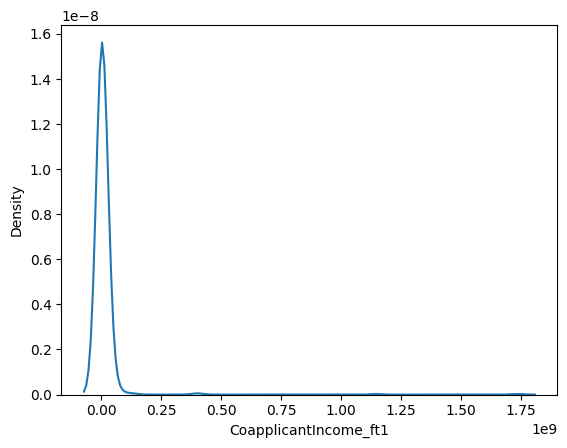

In [35]:
sns.kdeplot(data["CoapplicantIncome_ft1"])